In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1

In [2]:
surg = pd.read_csv('admissions_surg.csv')
surg.head()

,ID,ADMISSION.DATE,ADMISSION.TIME,DISCHARGE.DATE,DISCHARGE.TIME,DEPARTMENT,GENDER,AGE,MAIN.DIAGNOSIS.ICD10,MAIN.DIAGNOSIS.NAME
0,1068,1998-02-01,07:02,1998-03-31,07:17,General Surgery,M,NaN,E0800,Diabetes mellitus with complications
1,1125,2010-11-30,04:33,2011-03-25,20:59,General Surgery,F,24.0,M0500,Rheumatoid arthritis and related disease
2,1127,2015-03-05,09:40,2015-08-28,04:51,General Surgery,M,92.0,O045,Induced abortion
3,1363,1987-11-07,21:37,1988-05-10,15:32,General Surgery,F,93.0,A6000,Viral infection
4,1388,1997-07-03,03:44,1997-12-27,03:45,General Surgery,F,75.0,K640,Hemorrhoids


In [3]:
med = pd.read_csv('admissions_med.csv')
med.head()

,ID,admission_date,admission_time,discharge_date,discharge_time,department,gender,age,main_diagnosis_icd10,main_diagnosis_name
0,1064,1985-10-19,04:27,1986-01-01,NaN,General Internal Medicine,M,63.0,N830,Ovarian cyst
1,1066,1990-06-26,21:06,1990-09-03,21:03,General Internal Medicine,F,63.0,N410,Inflammatory conditions of male genital organs
2,1074,1994-06-13,06:36,1994-12-22,07:21,General Internal Medicine,F,51.0,K640,Hemorrhoids
3,1108,2005-03-11,21:54,2005-04-19,NaN,General Internal Medicine,F,NaN,C6200,Cancer of testis
4,1137,1997-06-26,09:49,1997-09-06,21:03,General Internal Medicine,M,81.0,I462,Cardiac arrest and ventricular fibrillation


In [4]:
img = pd.read_csv('img.csv')
img.head()

,ID,test_name,ordered_date_time,performed_date,performed_time,technician_name,brief_report
0,1064,US,NaN,1985-12-17,10:27,Trevon Hopson,No significant abnormality
1,1064,US PELVIS,NaN,1985-12-02,11:40,Claire Melko,Indication: normal
2,1066,Abdomen CT,NaN,1990-08-05,12:26,Ladonna Mcallister,Indication: Normal
3,1068,US,NaN,1998-03-24,16:15,claire melko,Indication: Normal
4,1074,CT neck + head,NaN,1994-11-05,01:36,Lorena Burciaga,Normal


In [5]:
print(surg.columns)
print(med.columns)
print(img.columns)

Index(['ID', 'ADMISSION.DATE', 'ADMISSION.TIME', 'DISCHARGE.DATE',
       'DISCHARGE.TIME', 'DEPARTMENT', 'GENDER', 'AGE', 'MAIN.DIAGNOSIS.ICD10',
       'MAIN.DIAGNOSIS.NAME'],
      dtype='object')
Index(['ID', 'admission_date', 'admission_time', 'discharge_date',
       'discharge_time', 'department', 'gender', 'age', 'main_diagnosis_icd10',
       'main_diagnosis_name'],
      dtype='object')
Index(['ID', 'test_name', 'ordered_date_time', 'performed_date',
       'performed_time', 'technician_name', 'brief_report'],
      dtype='object')


In [6]:
surg = surg.rename(dict(zip(surg.columns, med.columns)), axis='columns')

In [7]:
df = pd.concat([surg, med], ignore_index=True)
df = df.merge(img, on='ID')

In [8]:
df['admission_dt'] = pd.to_datetime(df['admission_date'] + ' ' + df['admission_time'])
df['discharge_dt'] = pd.to_datetime(df['discharge_date'] + ' ' + df['discharge_time'])
df['performed_dt'] = pd.to_datetime(df['performed_date'] + ' ' + df['performed_time'])
df['ordered_date_time'] = pd.to_datetime(df['ordered_date_time'])

In [9]:
df = df.drop(['admission_date', 'admission_time', 'discharge_date','discharge_time','performed_date','performed_time'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    5000 non-null   int64         
 1   department            5000 non-null   object        
 2   gender                5000 non-null   object        
 3   age                   4701 non-null   float64       
 4   main_diagnosis_icd10  5000 non-null   object        
 5   main_diagnosis_name   4591 non-null   object        
 6   test_name             5000 non-null   object        
 7   ordered_date_time     3302 non-null   datetime64[ns]
 8   technician_name       5000 non-null   object        
 9   brief_report          5000 non-null   object        
 10  admission_dt          5000 non-null   datetime64[ns]
 11  discharge_dt          4426 non-null   datetime64[ns]
 12  performed_dt          5000 non-null   datetime64[ns]
dtypes: datetime64[ns](

In [11]:
for cl in df.columns:
    print('{}: {:.2f}'.format(cl, sum(df[cl].isnull())*100/len(df)))

ID: 0.00
department: 0.00
gender: 0.00
age: 5.98
main_diagnosis_icd10: 0.00
main_diagnosis_name: 8.18
test_name: 0.00
ordered_date_time: 33.96
technician_name: 0.00
brief_report: 0.00
admission_dt: 0.00
discharge_dt: 11.48
performed_dt: 0.00


## Q2

In [12]:
df['length_of_stay'] = (df['discharge_dt']-df['admission_dt']).dt.days
df['length_of_stay']

0        58.0
1       115.0
2       175.0
3       175.0
4       184.0
        ...  
4995    153.0
4996    153.0
4997    162.0
4998    162.0
4999    162.0
Name: length_of_stay, Length: 5000, dtype: float64

In [13]:
q2_df = df.groupby('department').mean()[['age','length_of_stay']]

In [14]:
q2_df

,age,length_of_stay
department,,
Addiction Services,56.853403,99.708861
General Internal Medicine,56.572956,98.292339
General Surgery,56.522155,99.711503
Obstetrics,58.181416,104.387244
Oncology,57.455621,104.132166
Palliative Care,56.521236,95.412500


## Q3

In [15]:
img['performed_dt'] = pd.to_datetime(img['performed_date'] + ' ' + img['performed_time'])
img['performed_date'] = pd.to_datetime(img['performed_date']).dt.date
q3_df = img[img['performed_dt']==img.groupby('test_name')['performed_dt'].transform('min')]

In [16]:
q3_df = q3_df[['ID', 'test_name', 'performed_date']]

In [17]:
q3_df =q3_df.pivot(index='ID', columns='test_name', values='performed_date')

In [18]:
q3_df

test_name,ABDOMEN/PELVIS US,Abdomen CT,CT,CT - ABDOMEN,CT - Femur,CT neck + head,DOP LEG VEIN,DOPPLER US,Doppler Ultrasound,Head ct,LT LEG DOPPLER,NECK AND HEAD CT,RT LEG DOPPLER,THORAX/ABDOMEN CT,US,US ABDOMEN,US PELVIS,Ultrasound,ct neck,ct neck and head
ID,,,,,,,,,,,,,,,,,,,,
4177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-05-15,NaN
4573,NaN,NaN,NaN,NaN,NaN,NaN,1980-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22914,NaN,1980-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28711,1980-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-19,NaN,NaN,NaN,NaN,NaN
51591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54816,NaN,NaN,NaN,NaN,1981-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q4

In [19]:
q4_df = df.dropna(thresh=2)

In [20]:
print('Non-zero missing rate(%)')
for col in q4_df.columns:
    if sum(q4_df[col].isnull())*100/len(q4_df) != 0:
        print('{}:\t{}%'.format(col, sum(q4_df[col].isnull())*100/len(q4_df)))

Non-zero missing rate(%)
age:	5.98%
main_diagnosis_name:	8.18%
ordered_date_time:	33.96%
discharge_dt:	11.48%
length_of_stay:	11.48%


## Q5

In [21]:
a = df['age'].mean()

In [22]:
q5_df = df
q5_df['age'] = q5_df['age'].fillna(a)

In [23]:
q5_df

,ID,department,gender,age,main_diagnosis_icd10,main_diagnosis_name,test_name,ordered_date_time,technician_name,brief_report,admission_dt,discharge_dt,performed_dt,length_of_stay
0,1068,General Surgery,M,56.873431,E0800,Diabetes mellitus with complications,US,NaT,claire melko,Indication: Normal,1998-02-01 07:02:00,1998-03-31 07:17:00,1998-03-24 16:15:00,58.0
1,1125,General Surgery,F,24.000000,M0500,Rheumatoid arthritis and related disease,ct neck and head,NaT,zach straughter,Normal,2010-11-30 04:33:00,2011-03-25 20:59:00,2011-03-12 12:33:00,115.0
2,1127,General Surgery,M,92.000000,O045,Induced abortion,ct neck,NaT,mastoora al-kaber,Cancer,2015-03-05 09:40:00,2015-08-28 04:51:00,2015-05-08 03:06:00,175.0
3,1127,General Surgery,M,92.000000,O045,Induced abortion,RT LEG DOPPLER,NaT,marco carr,"On visual analysis, normal",2015-03-05 09:40:00,2015-08-28 04:51:00,2015-05-21 02:44:00,175.0
4,1363,General Surgery,F,93.000000,A6000,Viral infection,ct neck,NaT,marco carr,No significant abnormality,1987-11-07 21:37:00,1988-05-10 15:32:00,1988-01-26 11:47:00,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,99979,General Internal Medicine,M,95.000000,H40001,Glaucoma,DOPPLER US,2004-10-21 22:49:00,jessenya vega,Probable new diagnosis of cancer,2004-07-16 15:03:00,2004-12-17 04:11:00,2004-10-21 23:58:00,153.0
4996,99979,General Internal Medicine,M,95.000000,H40001,Glaucoma,NECK AND HEAD CT,2004-08-16 13:28:00,marco carr,Cancer,2004-07-16 15:03:00,2004-12-17 04:11:00,2004-08-18 03:19:00,153.0
4997,99991,Palliative Care,F,100.000000,T424X1A,Poisoning by psychotropic agents,CT neck + head,2002-09-18 09:50:00,ladonna mcallister,Rule out metastases,2002-05-26 04:52:00,2002-11-04 09:12:00,2002-09-19 20:47:00,162.0
4998,99991,Palliative Care,F,100.000000,T424X1A,Poisoning by psychotropic agents,RT LEG DOPPLER,2002-09-20 17:41:00,dashanay langer,No significant abnormality,2002-05-26 04:52:00,2002-11-04 09:12:00,2002-09-20 23:25:00,162.0


## Q6

In [24]:
img.head()

,ID,test_name,ordered_date_time,performed_date,performed_time,technician_name,brief_report,performed_dt
0,1064,US,NaN,1985-12-17,10:27,Trevon Hopson,No significant abnormality,1985-12-17 10:27:00
1,1064,US PELVIS,NaN,1985-12-02,11:40,Claire Melko,Indication: normal,1985-12-02 11:40:00
2,1066,Abdomen CT,NaN,1990-08-05,12:26,Ladonna Mcallister,Indication: Normal,1990-08-05 12:26:00
3,1068,US,NaN,1998-03-24,16:15,claire melko,Indication: Normal,1998-03-24 16:15:00
4,1074,CT neck + head,NaN,1994-11-05,01:36,Lorena Burciaga,Normal,1994-11-05 01:36:00


In [25]:
freq = img.groupby('test_name').count().sort_values('ID', ascending=False)['ID']

In [26]:
img_mapper = pd.DataFrame(freq).reset_index().rename({'ID':'freq'}, axis='columns')

In [27]:
img_mapper['mapped_test']='Others'

In [28]:
img_mapper.loc[img_mapper['test_name'].str.contains('US|ultrasound', case=False), 'mapped_test'] = 'US'
img_mapper.loc[img_mapper['test_name'].str.contains('CT', case=False), 'mapped_test'] = 'CT'

In [29]:
img_mapper['mapped_bodypart']='Others'
img_mapper.loc[img_mapper['test_name'].str.contains('neck|head', case=False), 'mapped_bodypart'] = 'Neck/Head'
img_mapper.loc[img_mapper['test_name'].str.contains('abdomen|pelvis', case=False), 'mapped_bodypart'] = 'Abdomen/pelvis'

In [30]:
img_mapper

,test_name,freq,mapped_test,mapped_bodypart
0,US,680,US,Others
1,CT,511,CT,Others
2,Ultrasound,441,US,Others
3,ct neck and head,408,CT,Neck/Head
4,US ABDOMEN,396,US,Abdomen/pelvis
5,CT neck + head,385,CT,Neck/Head
6,ABDOMEN/PELVIS US,313,US,Abdomen/pelvis
7,CT - ABDOMEN,310,CT,Abdomen/pelvis
8,NECK AND HEAD CT,248,CT,Neck/Head
9,Doppler Ultrasound,233,US,Others


## Q7

In [31]:
img['year'] = img['performed_dt'].dt.year

In [32]:
img.groupby(['year','test_name']).count()

ID  ordered_date_time  performed_date  performed_time  \
year test_name                                                                  
1980 ABDOMEN/PELVIS US   5                  4               5               5   
     Abdomen CT          7                  2               7               7   
     CT                 12                  8              12              12   
     CT - ABDOMEN        7                  7               7               7   
     CT neck + head      5                  5               5               5   
...                     ..                ...             ...             ...   
2020 US                 14                  7              14              14   
     US ABDOMEN          9                  6               9               9   
     Ultrasound          8                  7               8               8   
     ct neck             4                  3               4               4   
     ct neck and head    8                  4               8               8   

                        technician_name  brief_report  performed_dt  
year test_name                                                       
1980 ABDOMEN/PELVIS US                5             5             5  
     Abdomen CT                       7             7             7  
     CT                              12            12            12  
     CT - ABDOMEN                     7             7             7  
     CT neck + head                   5             5             5  
...                                 ...           ...           ...  
2020 US                              14            14            14  
     US ABDOMEN                       9             9             9  
     Ultrasound                       8             8             8  
     ct neck                          4             4             4  
     ct neck and head                 8             8             8  

[779 rows x 7 columns]

## Q8

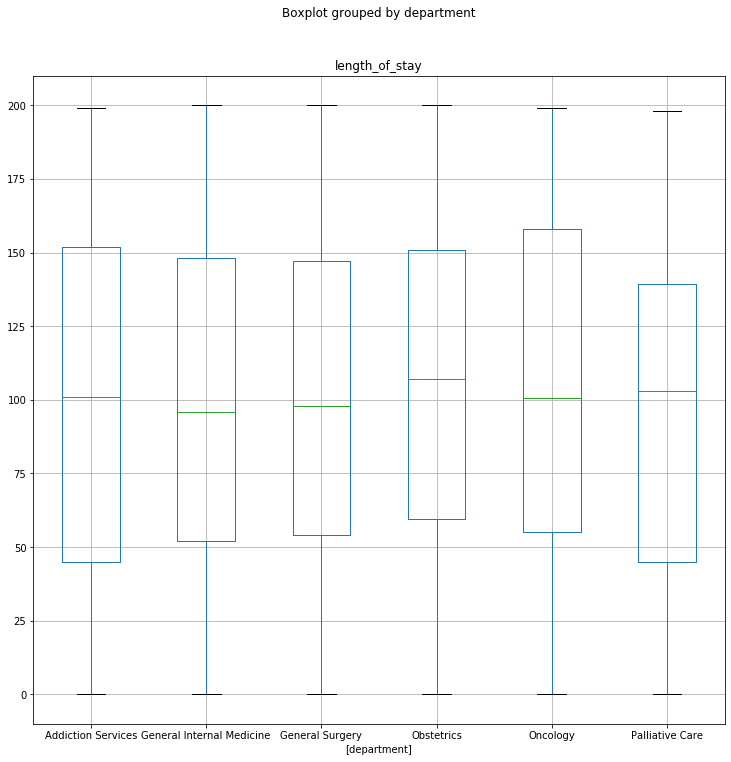

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
df.boxplot(column=['length_of_stay'], by=['department'], ax=ax)

In [34]:
df.head()

,ID,department,gender,age,main_diagnosis_icd10,main_diagnosis_name,test_name,ordered_date_time,technician_name,brief_report,admission_dt,discharge_dt,performed_dt,length_of_stay
0,1068,General Surgery,M,56.873431,E0800,Diabetes mellitus with complications,US,NaT,claire melko,Indication: Normal,1998-02-01 07:02:00,1998-03-31 07:17:00,1998-03-24 16:15:00,58.0
1,1125,General Surgery,F,24.000000,M0500,Rheumatoid arthritis and related disease,ct neck and head,NaT,zach straughter,Normal,2010-11-30 04:33:00,2011-03-25 20:59:00,2011-03-12 12:33:00,115.0
2,1127,General Surgery,M,92.000000,O045,Induced abortion,ct neck,NaT,mastoora al-kaber,Cancer,2015-03-05 09:40:00,2015-08-28 04:51:00,2015-05-08 03:06:00,175.0
3,1127,General Surgery,M,92.000000,O045,Induced abortion,RT LEG DOPPLER,NaT,marco carr,"On visual analysis, normal",2015-03-05 09:40:00,2015-08-28 04:51:00,2015-05-21 02:44:00,175.0
4,1363,General Surgery,F,93.000000,A6000,Viral infection,ct neck,NaT,marco carr,No significant abnormality,1987-11-07 21:37:00,1988-05-10 15:32:00,1988-01-26 11:47:00,184.0


## Q9

In [35]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse, f1_score, precision_score as precision, recall_score as recall
from sklearn.model_selection import train_test_split, KFold

In [36]:
df['length_of_stay'] = df['length_of_stay'].fillna(df.groupby('department')['length_of_stay'].transform('mean'))


In [37]:
train = df[['length_of_stay','age','department','gender']]

In [38]:
train['gender'] = train['gender'].replace({'F':1, 'M':0})

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
train = pd.get_dummies(train, columns=['department'])

In [82]:
train.iloc[11]

length_of_stay                          104.387244
age                                      65.000000
gender                                    0.000000
department_Addiction Services             0.000000
department_General Internal Medicine      0.000000
department_General Surgery                0.000000
department_Obstetrics                     1.000000
department_Oncology                       0.000000
department_Palliative Care                0.000000
Name: 11, dtype: float64

In [41]:
y = train['length_of_stay']
X = train.drop('length_of_stay', axis=1).to_numpy()

In [42]:
y = y.to_numpy()

In [43]:
sum(train['length_of_stay'].isnull())/len(train)

0.0

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
linreg = LinearRegression()

In [46]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
mse(y_test,linreg.predict(X_test))

2737.8379337726183

## Q10

In [48]:
y = np.where(df['brief_report'].str.contains('cancer|tumer', case=False), 1, 0)

In [49]:
df['label'] = y

In [50]:
X = df[['department','gender','age','length_of_stay','test_name']]

In [51]:
X['gender'] = X['gender'].replace({'F':1, 'M':0})
X['test_name'] = X['test_name'].replace(dict(zip(img_mapper['test_name'], img_mapper['mapped_test'])))

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
X = pd.get_dummies(X, columns=['department', 'test_name'])

In [53]:
X = X.to_numpy()

In [54]:
sum(y)/len(y)

0.2208

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [56]:
logreg = LogisticRegression()

In [57]:
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7976

In [58]:
y_hat = logreg.predict(X_test)

## RESTful API

In [61]:
import os
from flask import Flask, jsonify, request
from flask_restful import Api, Resource
from sklearn.externals import joblib

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [62]:
joblib.dump(linreg, 'lr.model')

['lr.model']

In [63]:
app = Flask(__name__)
api = Api(app)

In [64]:
model = joblib.load('lr.model')

In [79]:
class MakePrediction(Resource):
    @staticmethod
    def post():
        posted_data = request.get_json()
        age = posted_data['age']
        department = posted_data['department']
        gender = posted_data['gender']
        
        #preprocess input
        dep = (['department_Addiction Services',
        'department_General Internal Medicine', 
        'department_General Surgery','department_Obstetrics', 
        'department_Oncology','department_Palliative Care'])
        department_num = [[0] for i in range(len(dep))]
        idx = dep.index(department)
        department_num[idx][0] = 1
        
        if gender == 'M':
            gender = 0
        else:
            gender = 1
        
        x = [[age, gender] + deparment_num]
        prediction = model.predict(x)
        
        return jsonify({'Prediction':prediction})

In [80]:
api.add_resource(MakePrediction, '/predict')

In [81]:
app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with fsevents reloader


SystemExit: 1

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [66]:
dep = (['department_Addiction Services',
        'department_General Internal Medicine', 
        'department_General Surgery','department_Obstetrics', 
        'department_Oncology','department_Palliative Care'])

Index(['length_of_stay', 'age', 'gender', 'department_Addiction Services',
       'department_General Internal Medicine', 'department_General Surgery',
       'department_Obstetrics', 'department_Oncology',
       'department_Palliative Care'],
      dtype='object')

In [68]:
department='department_Obstetrics'

In [76]:
dep = (['department_Addiction Services',
        'department_General Internal Medicine', 
        'department_General Surgery','department_Obstetrics', 
        'department_Oncology','department_Palliative Care'])
department_num = [0]*len(dep)
idx = dep.index(department)
department_num[idx] = 1

In [77]:
department_num

[0, 0, 0, 1, 0, 0]

In [73]:
department_num

[[0], [0], [0], [0], [0], [0]]

In [107]:
x = [56, 0, 0, 0, 0, 1, 0, 0]

In [108]:
linreg.predict([x,])

array([105.6963032])

In [104]:
x = np.array(x)
x.reshape(-1,1)

array([[56],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0]])